## Imports

In [2]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [3]:
dicom_file = pydicom.read_file("../imgs/ct_dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [5]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [6]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [34]:
dicom_file.SliceLocation

'-247.5'

In [7]:
dicom_file.Rows

512

In [8]:
ct = dicom_file.pixel_array

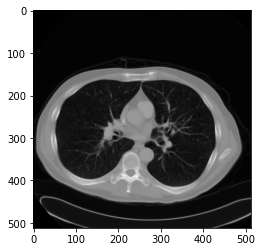

In [9]:
plt.imshow(ct, cmap="gray")

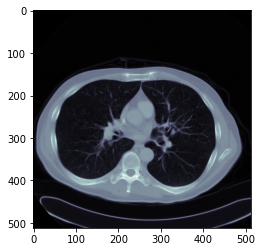

In [10]:
plt.imshow(ct, cmap="bone")

In [11]:
path_to_head_mri = Path("../imgs/mri_dicom_dir/SE000001/")

In [12]:
all_files = list(path_to_head_mri.glob("*"))

In [13]:
all_files

[WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000000'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000001'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000002'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000003'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000004'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000005'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000006'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000007'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000008'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000009'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000010'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000011'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000012'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000013'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000014'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000015'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000016'),
 WindowsPath('../imgs/mri_dicom

In [14]:
mri_data = []

for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

In [15]:
len(mri_data)

27

In [16]:
for slice in mri_data[0:5]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


## Display Images

In [17]:
full_volume = []

for slice in mri_data:
    full_volume.append(slice.pixel_array)

In [18]:
len(full_volume)

27

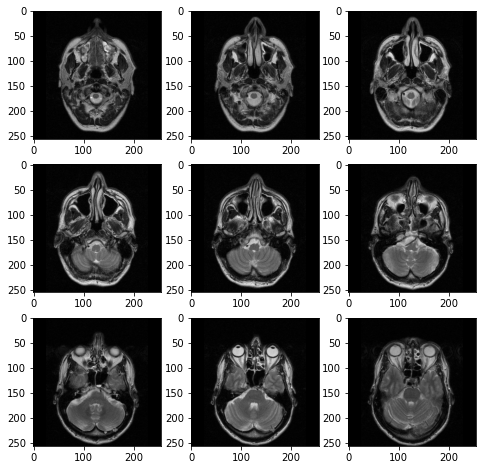

In [20]:
fig, axis = plt.subplots(3,3, figsize=(8,8))   
    
slice_counter = 0

for row in range(3):
    for column in range(3):
        axis[row][column].imshow(full_volume[slice_counter], cmap="gray")
        
        slice_counter += 1
    

## Simplitk

In [21]:
import SimpleITK as sitk

In [22]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))

In [23]:
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [24]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])

In [26]:
series_file_names

('..\\imgs\\mri_dicom_dir\\SE000001\\MR000000',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000001',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000002',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000003',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000004',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000005',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000006',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000007',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000008',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000009',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000010',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000011',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000012',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000013',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000014',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000015',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000016',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000017',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000018',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR000019',
 '..\\imgs\\mri_dicom_dir\\SE000001\\MR0

In [27]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [28]:
image_data = series_reader.Execute()

In [29]:
head_mri = sitk.GetArrayFromImage(image_data)

In [30]:
head_mri.shape

(27, 256, 256)

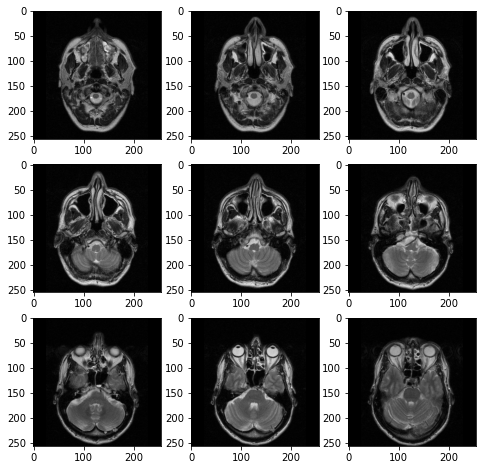

In [31]:
fig, axis = plt.subplots(3,3, figsize=(8,8))   
    
slice_counter = 0

for row in range(3):
    for column in range(3):
        axis[row][column].imshow(head_mri[slice_counter], cmap="gray")
        
        slice_counter += 1